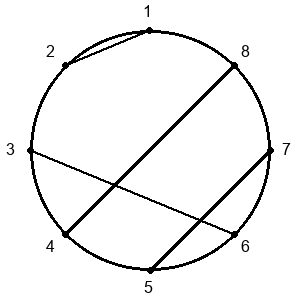

In [98]:
#測試繪圖的功能
def drawlink(pair, pxy, draw):
    linept = [(pxy[i][0], pxy[i][1]) for i in pair]
    draw.line(linept, width=3, fill="black")

def draw_result(result_pair, n, size = 300, margin = 0.1, bottom = 1):

    from PIL import Image, ImageDraw, ImageFont
    import io
    import math

    image = Image.new("RGB",(size,size),"white")
    draw = ImageDraw.Draw(image)
    draw.arc((margin*size,margin*size,(1-margin)*size,(1-margin)*size),0,360,width=3,fill="black")
    r = (1-2*margin)*size/2
    angle = 2*math.pi/n
    cxy = {i+1: (math.sin(i*angle-bottom*angle+angle), math.cos(i*angle-bottom*angle+angle)) for i in range(n)}
    pxy = {i: (r*cxy[i][0] + size/2, r*cxy[i][1] + size/2) for i in cxy}

    dot_size = 3
    font = ImageFont.truetype("arial.ttf",size= 12 + size//62 - n//16)
    for i in pxy:
        x = pxy[i][0]
        y = pxy[i][1]
        draw.ellipse((x-dot_size, y-dot_size, x+dot_size, y+dot_size), fill="black")

        x2 = r*1.15*cxy[i][0] + size/2 - 6
        y2 = r*1.15*cxy[i][1] + size/2 - 10
        draw.text((x2,y2),str(i),font=font,fill="black",align="right")

    for p in result_pair:
        drawlink(p, pxy = pxy, draw = draw)

    bio = io.BytesIO()
    image.save(bio,"png")
    image2 = Image.open(bio)
    display(image2)
    
#draw_result (要連接成對的點, 點數, 最底的點)

#連接1,2; 3,6 ..., 圓上有8點, 最底是5.
draw_result([(1,2),(3,6),(4,8),(5,7)],8,bottom=5)

In [ ]:
#處理點數運算,確保點數在1-2n

def minus(num, step, m):
    num -= step
    if num <= 0:
        num += m
    return num

def add(num, step, m):
    num += step
    if num > m:
        num -= m
    return num

#找符合條件的程序
#中途改了設計, 可能有點奇怪

def extend(result, links, n, new, bottom, size = None):
    global run_continue
    global store_resultNN
    
    if size is None:
        size = 300 + 200 * n//16
    
    if run_continue == 0:
        return
    
    if result.count(0) == 0:
        result_pair = []
        for i in range(n):
            result_pair.append((result[i],add(result[i], i+1, 2*n)))
        draw_result(result_pair, 2*n, size = size, bottom = bottom)
        run_continue -= 1
        return
    
    links2 = [i[:] for i in links]
    
    ends = []
    new2 = new[:]
    for i in range(n):
        if result[i] != 0:
            if new2[i]:
                enda = result[i]
                endb = add(enda, i + 1, 2*n)
                ends += [enda, endb]
                new2[i] = False
    
    for i in range(n):
        if result[i] == 0:
            takeaway = ends + [minus(x, i+1, 2*n) for x in ends]
            links2[i] = [j for j in links2[i] if j not in takeaway]
        if len(links2[i]) == 0:
            return
    
    fill = n - 1 - result[::-1].index(0)
    for i in links2[fill]:
        result2 = result[:]
        result2[fill] = i
        extend(result2, links2, n, new2, bottom, size)

開始的狀態


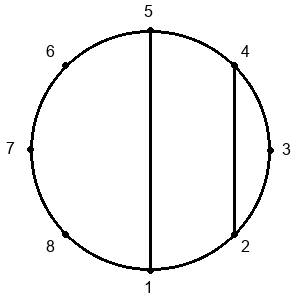


符合的連接


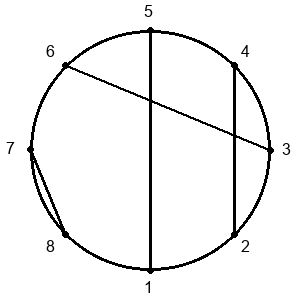

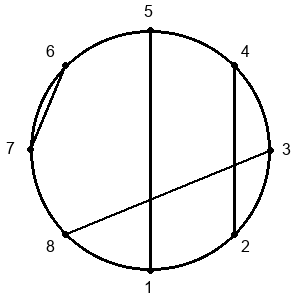

In [103]:
#主要運行的地方


#設定
#n 代表對數     
n = 4

#solution_max 最多顥示多少個解
solution_max = 100

#size是圓片大小
size = 300


#一些初始化
points = [*range(1, 2*n+1)]
links = [points for i in range(n)]
result = [0] * n
new = [True] * n
run_continue = solution_max


#這部分可以先填一些預設的規律
#這一段例子會中間填直徑, 然後在右邊半圓垂直連上
result[-1] = 1
for i in range(n-2, 0, -2):
    result[i - 1] = (n - i)//2 + 1

#說明:
#result[i]=x 代表在x處順時針數(i+1)點,與x連上
#例如result[4] = 3, 是連上3和(3+4+1) = 8兩點.
#例如n=10, 要連上20和1(距離1), 應該設定result[0] = 20.

#設定完

result_pair = []
for i in range(n):
    if result[i] != 0:
        result_pair.append((result[i],add(result[i], i+1, 2*n)))
        
        
#這裡預覽我們選了的規律
print("開始的狀態")
draw_result(result_pair,2*n,bottom = 1, size=size)

#這裡開始找解
print()
print("符合的連接")
extend(result,links,n,new,bottom=1, size = size)

開始的狀態


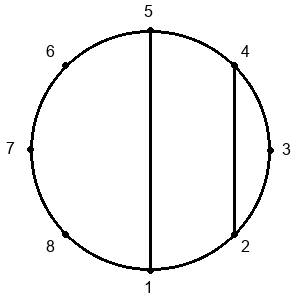


符合的連接


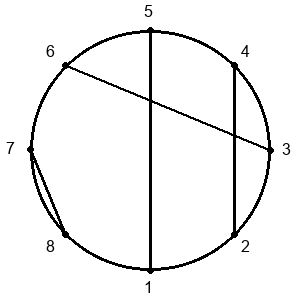

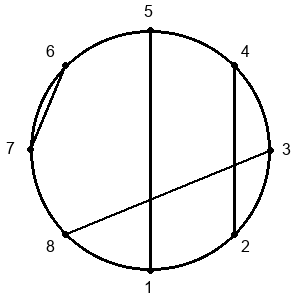

開始的狀態


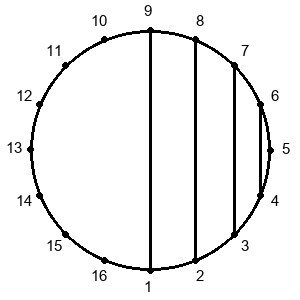


符合的連接


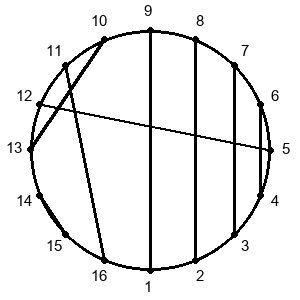

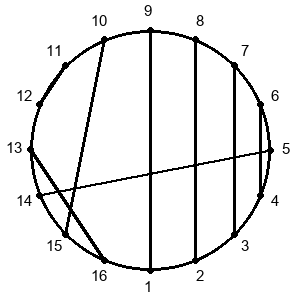

開始的狀態


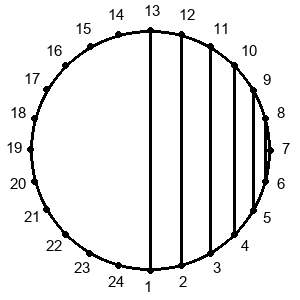


符合的連接


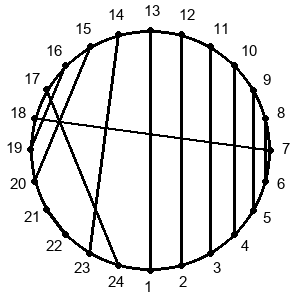

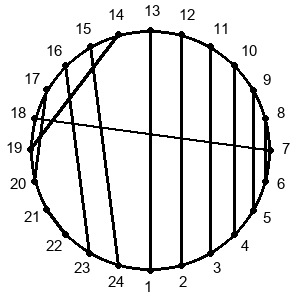

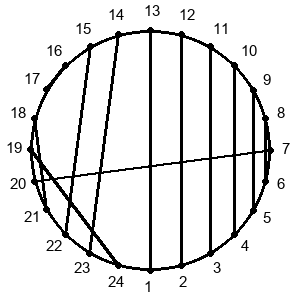

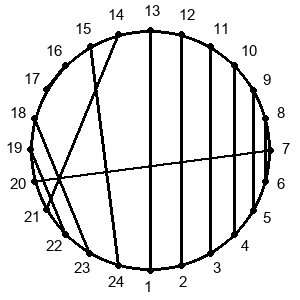

開始的狀態


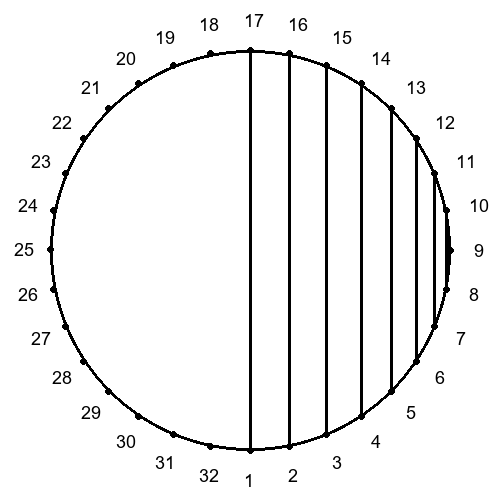


符合的連接


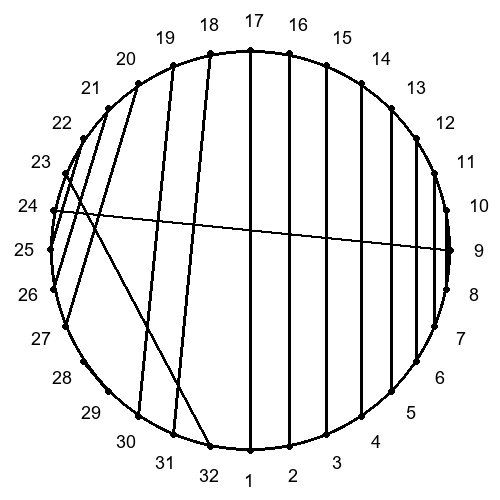

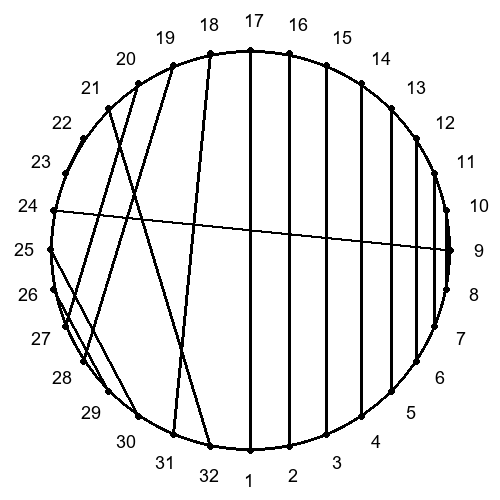

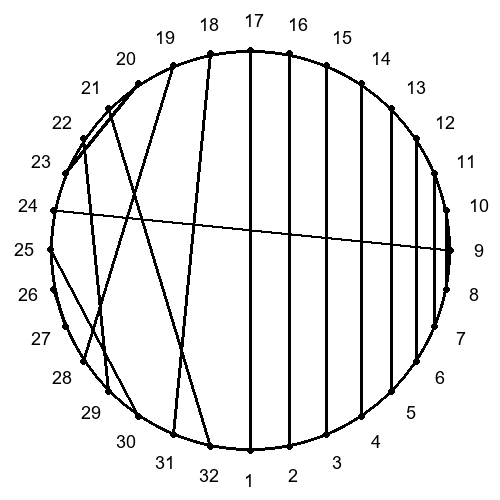

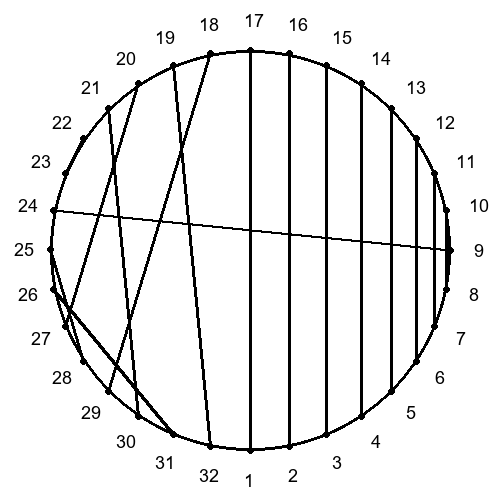

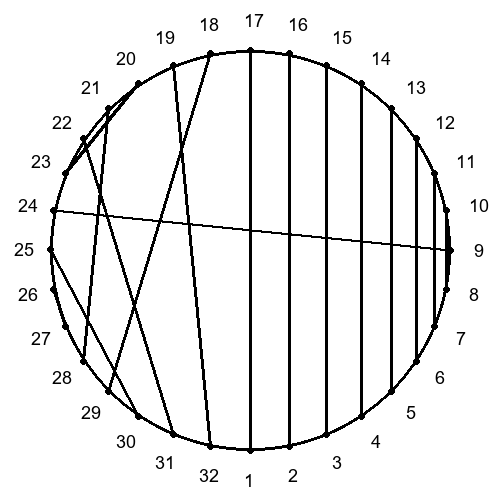

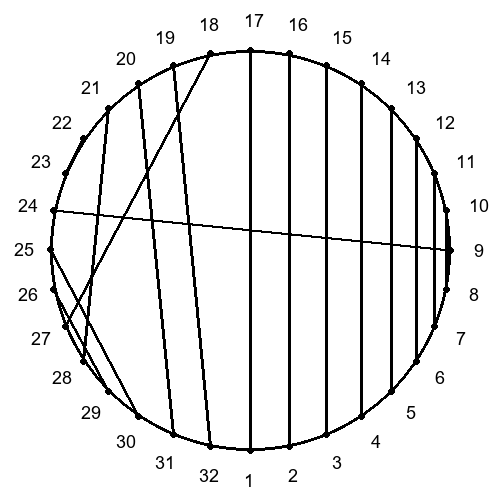

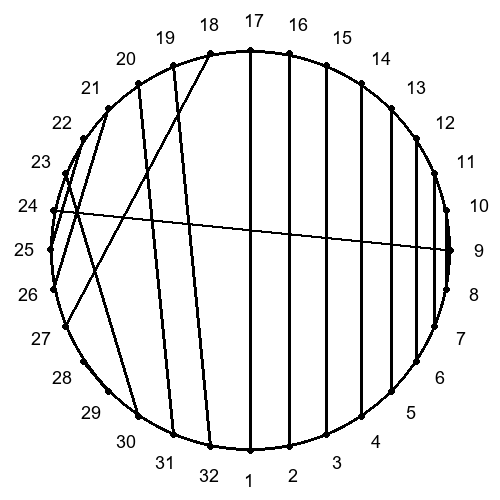

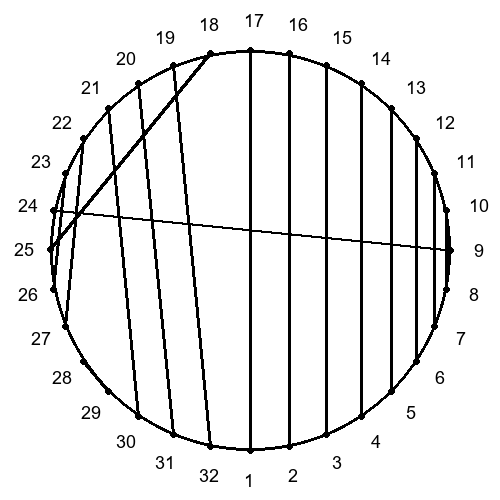

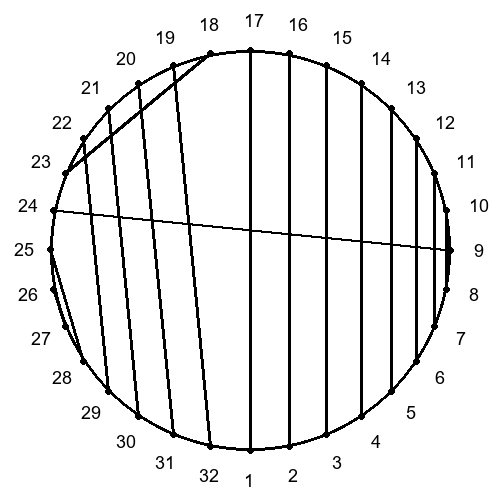

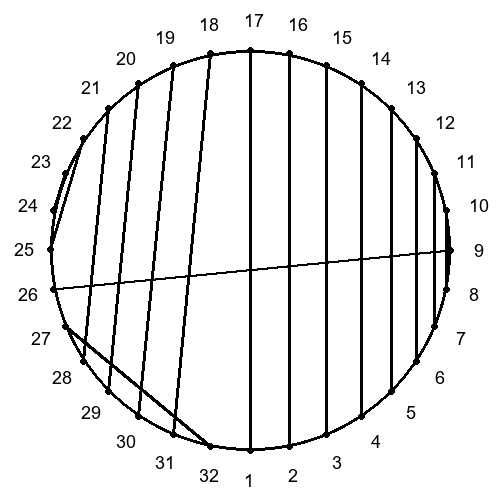

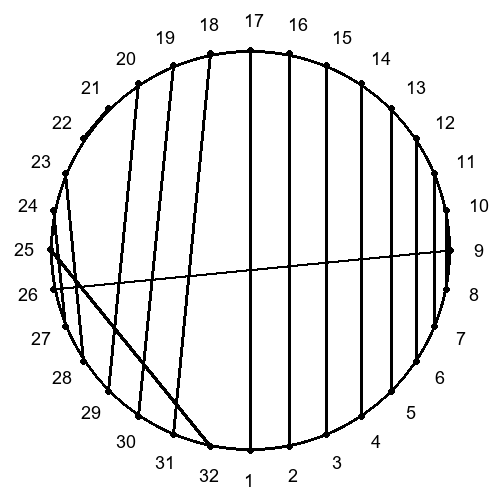

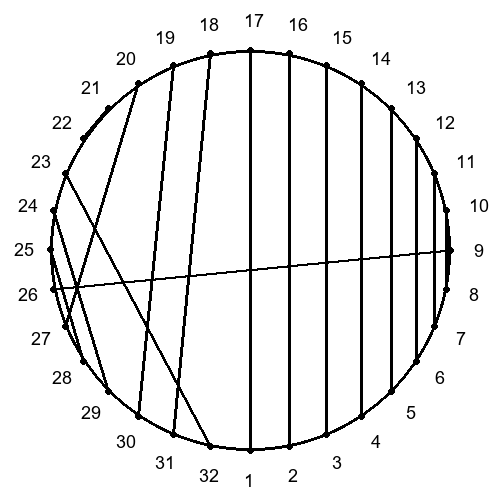

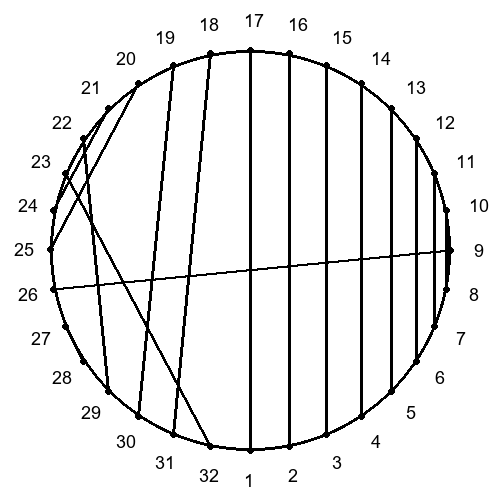

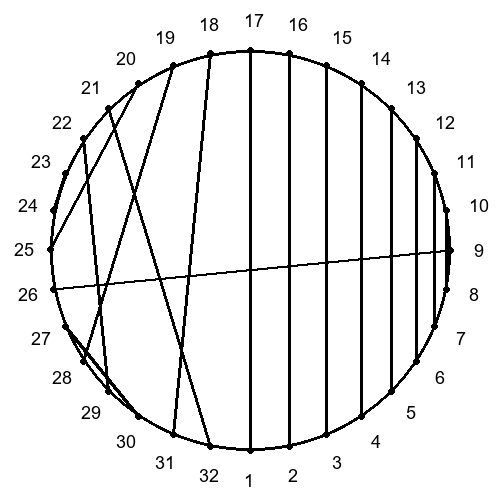

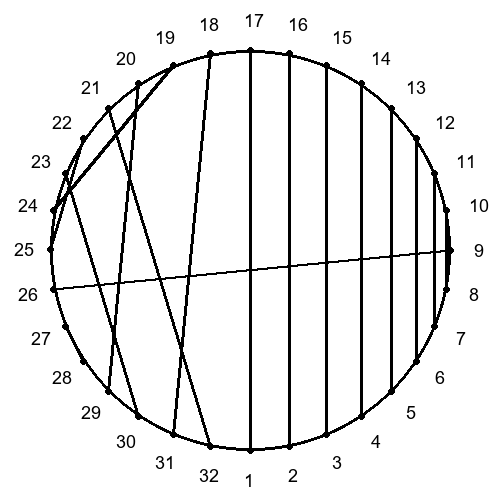

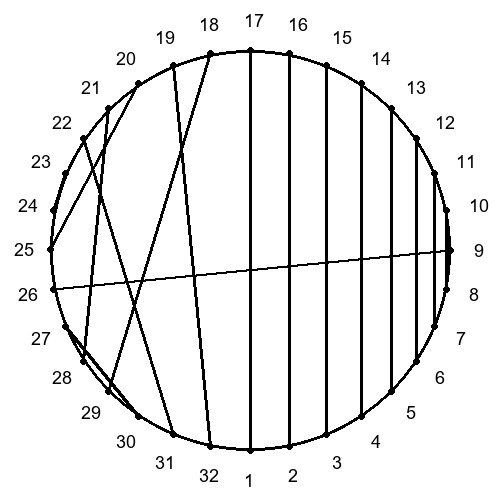

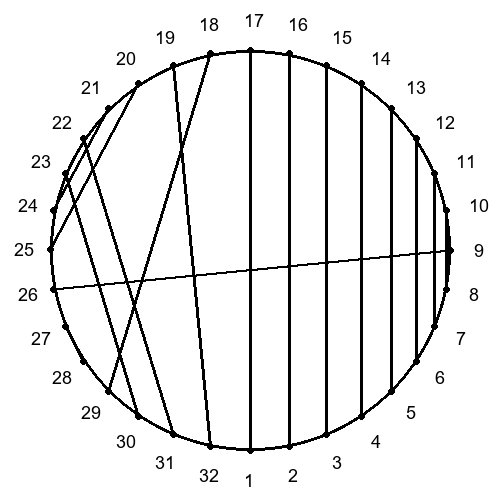

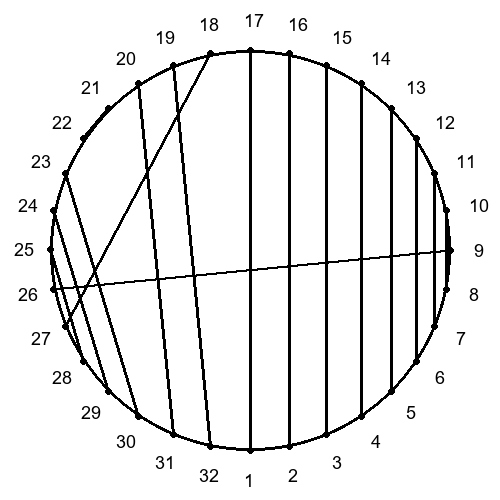

開始的狀態


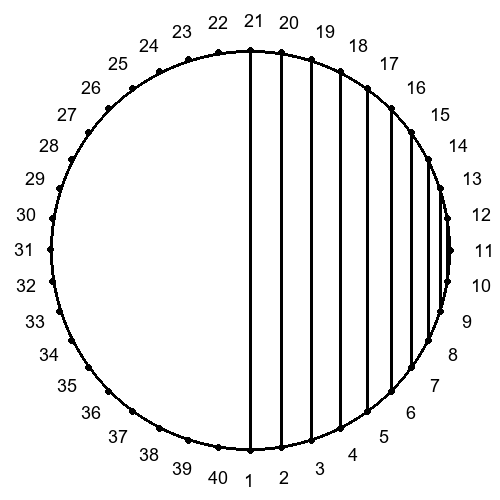


符合的連接


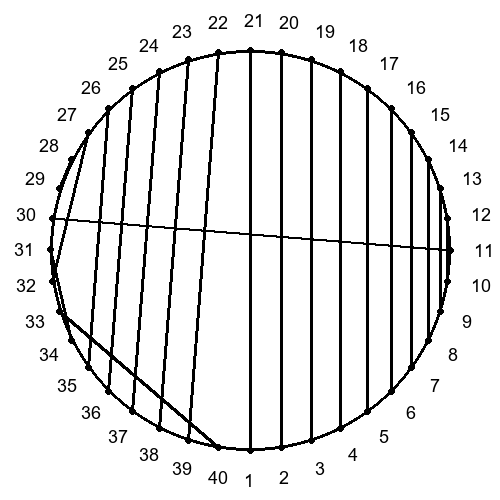

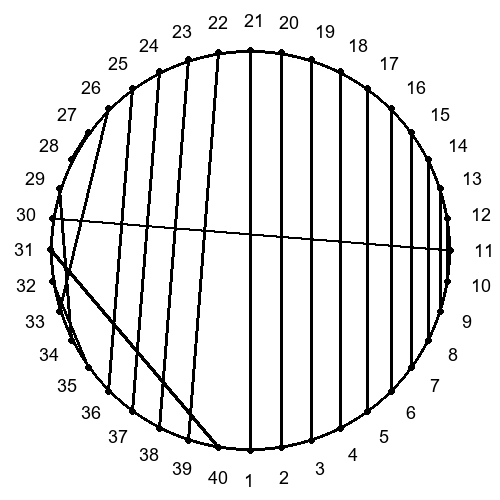

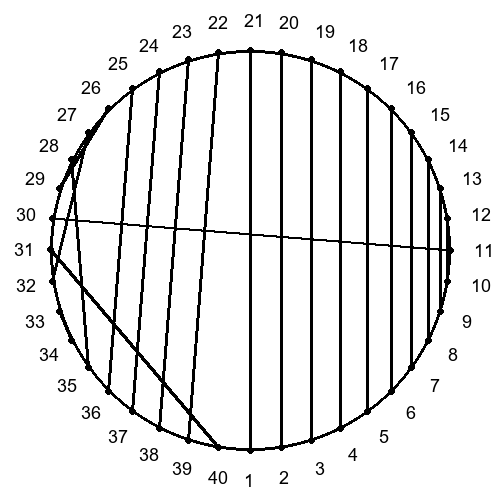

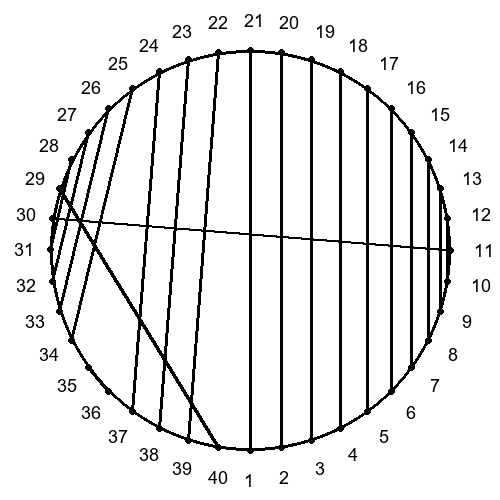

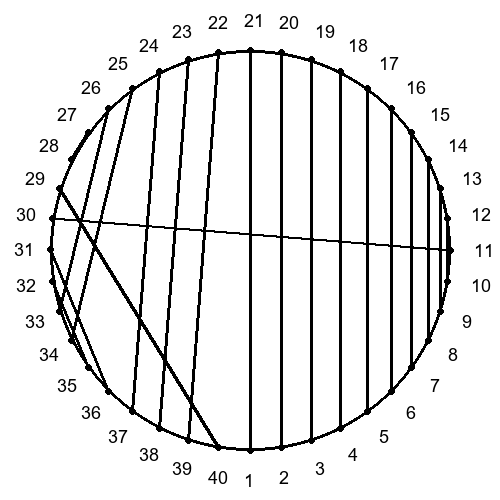

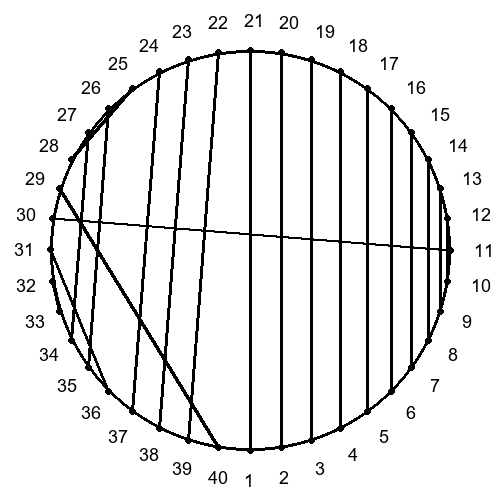

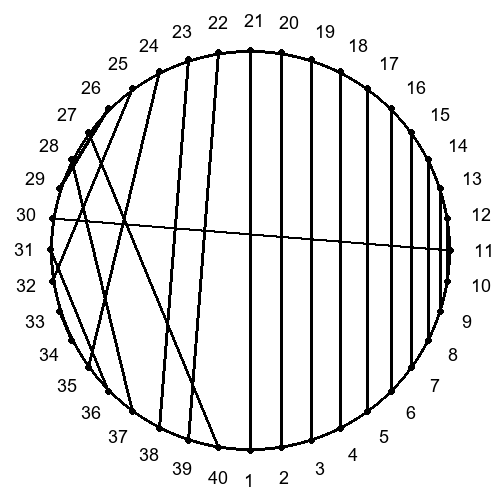

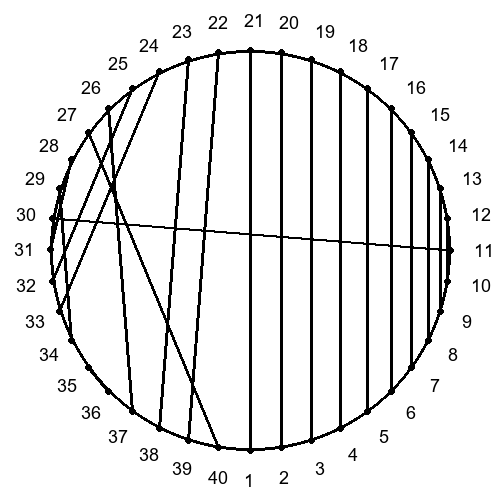

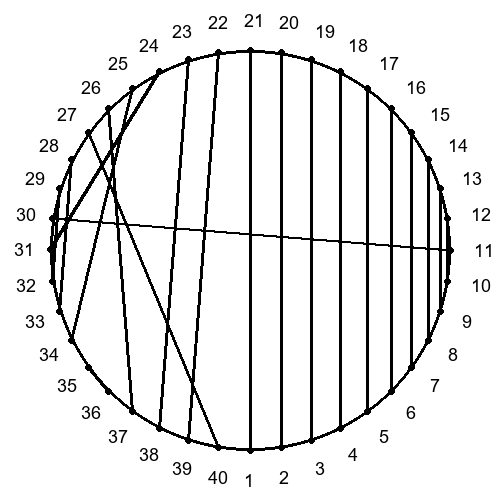

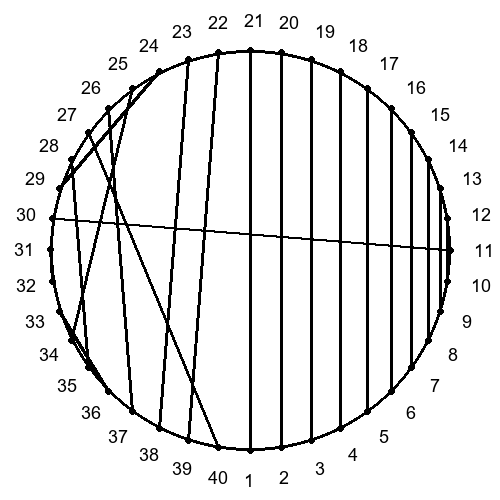

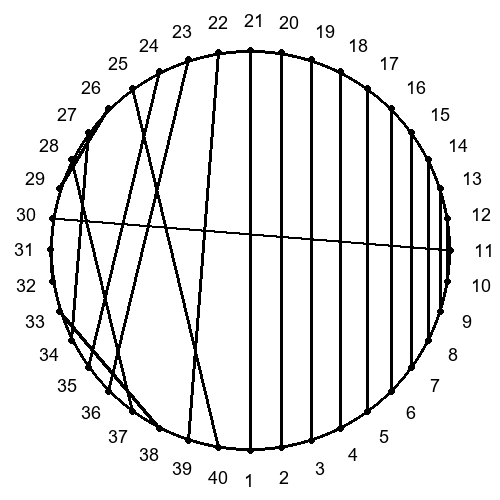

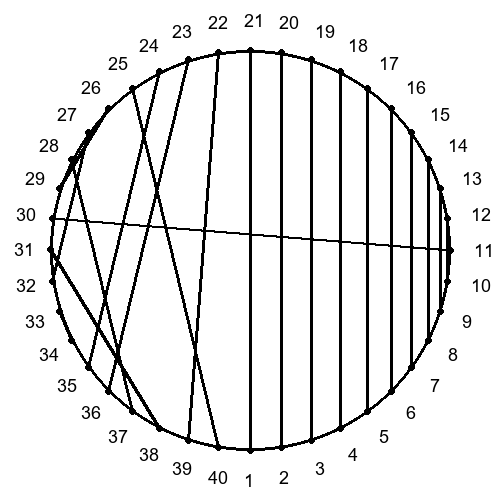

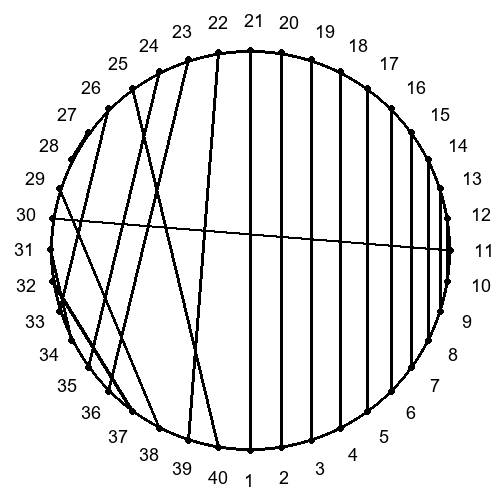

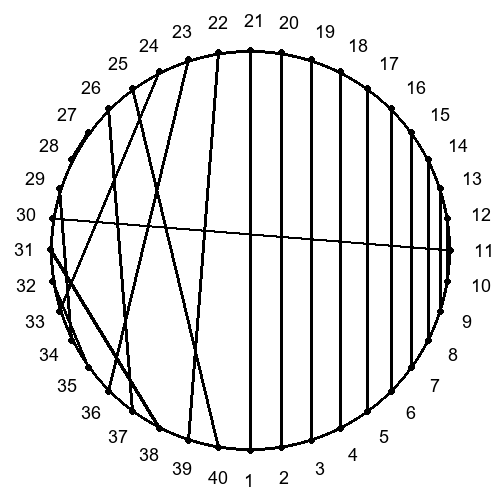

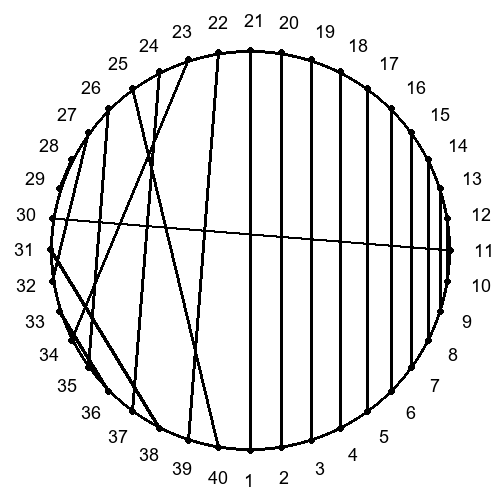

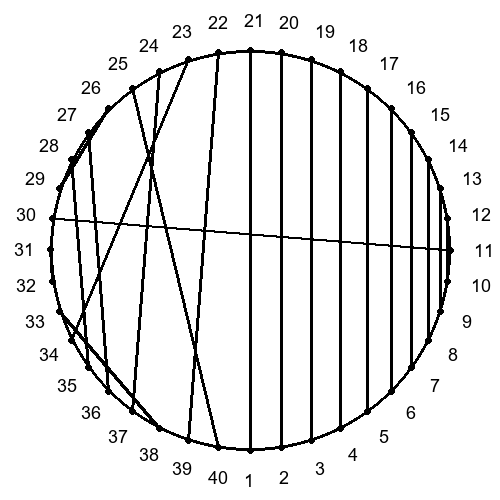

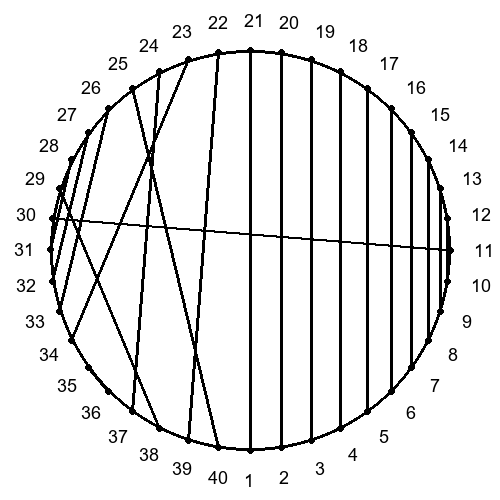

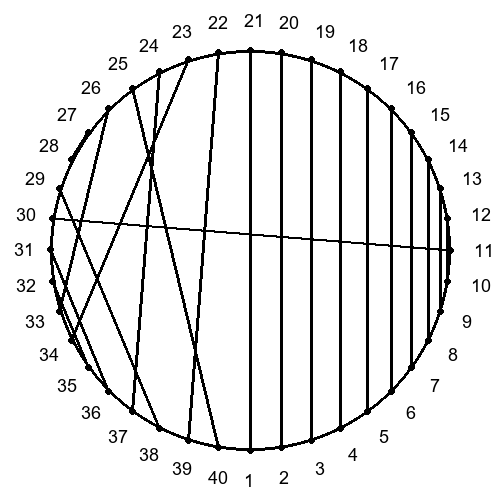

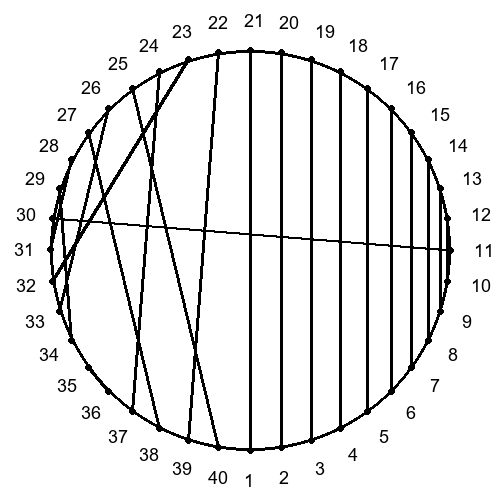

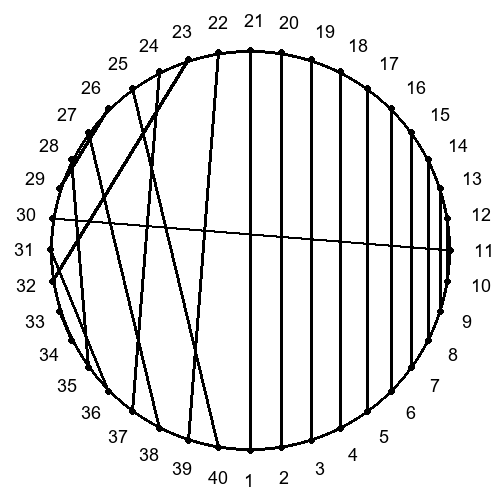

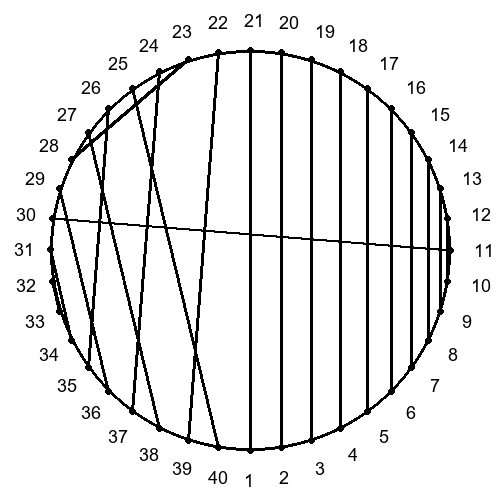

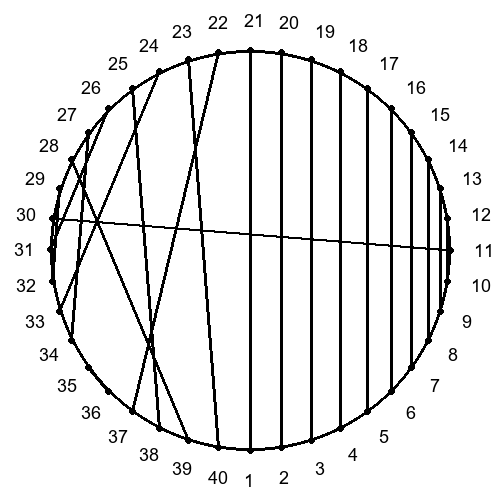

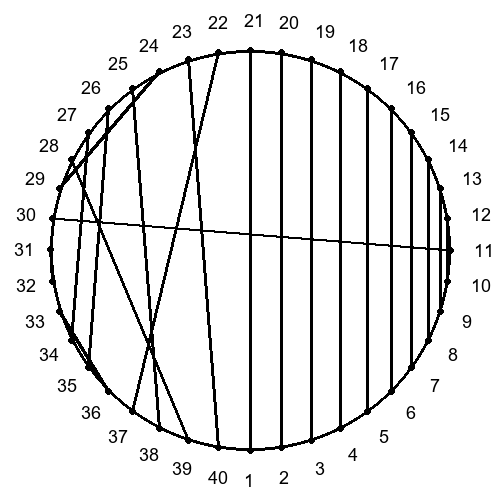

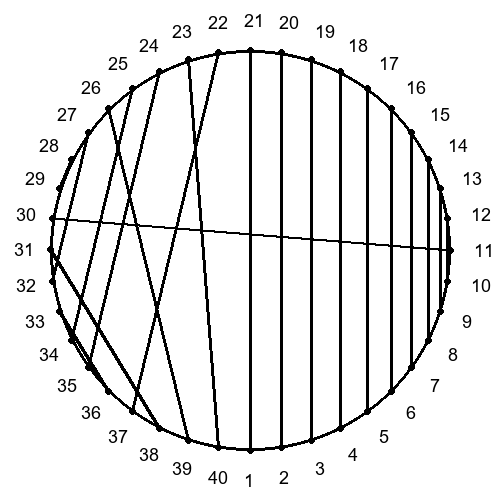

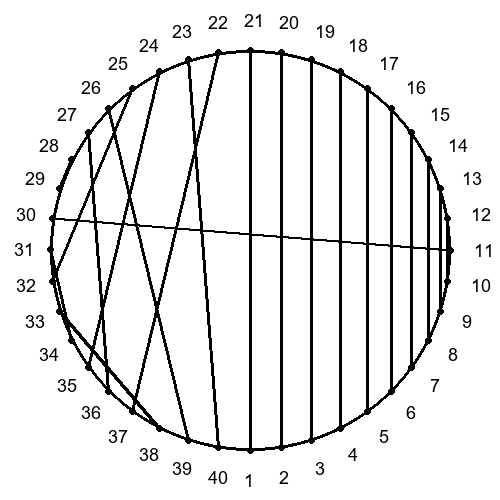

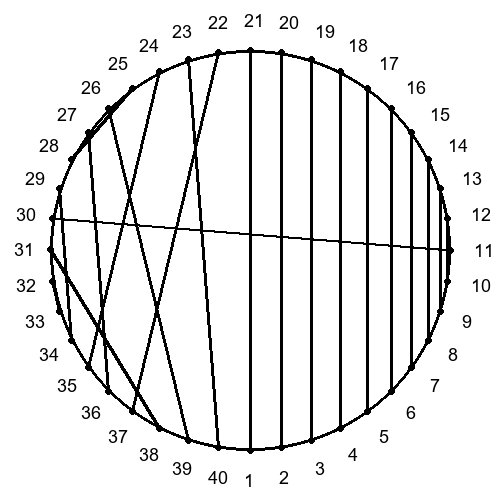

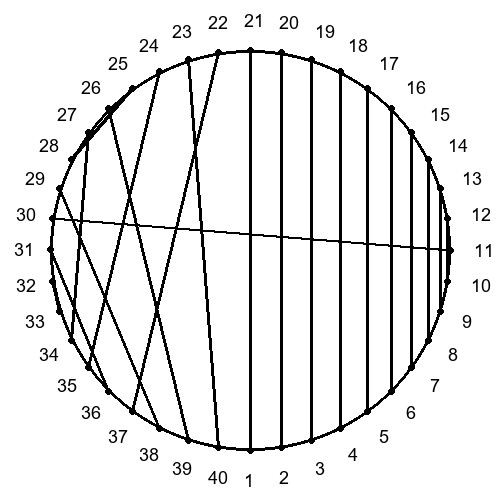

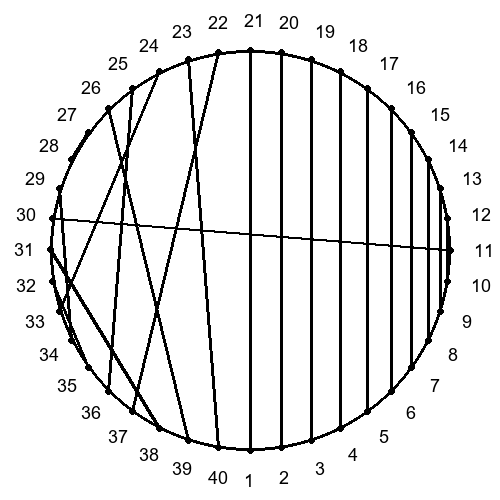

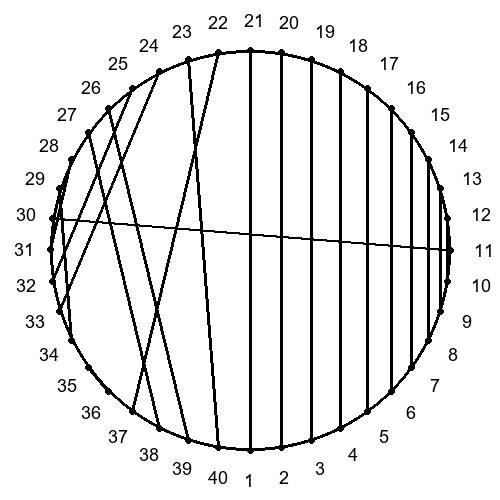

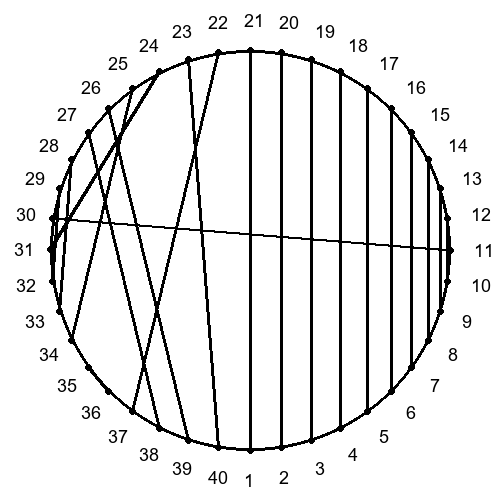

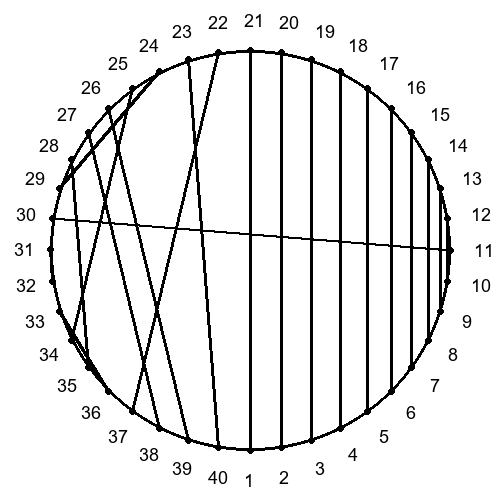

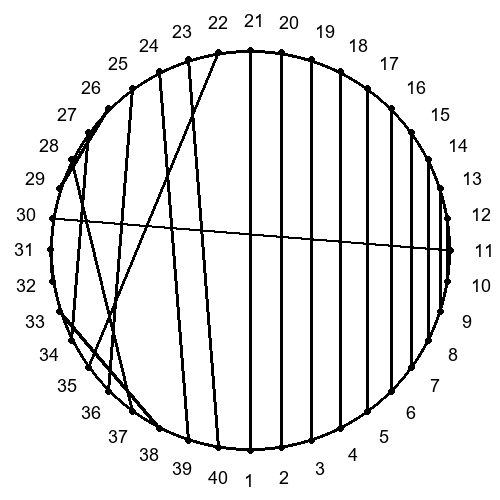

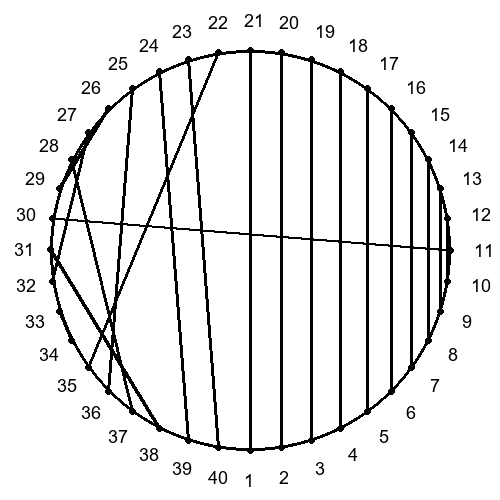

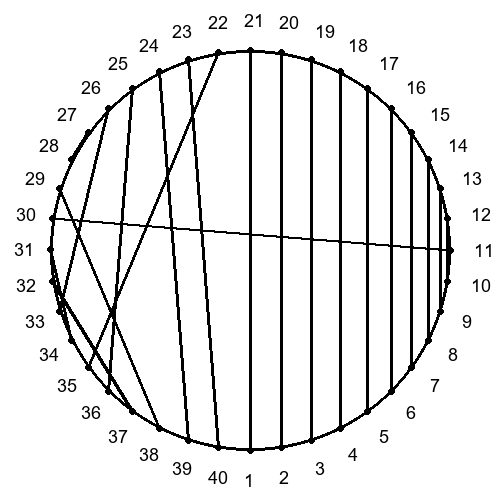

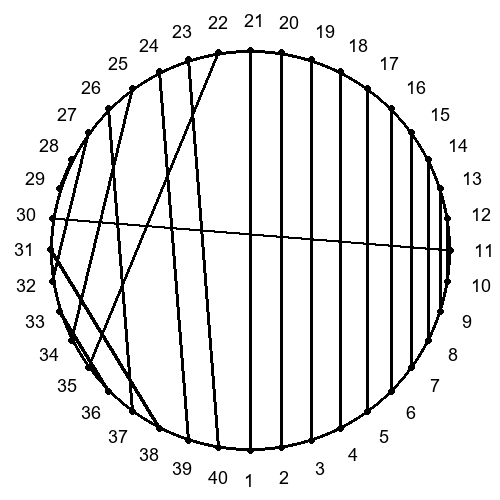

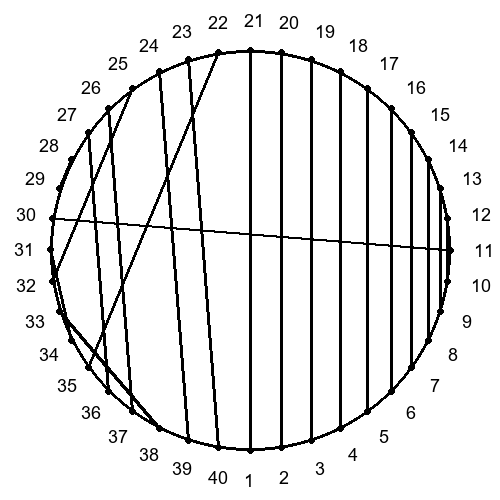

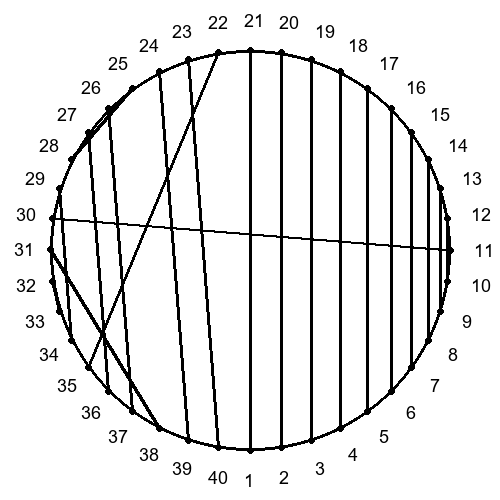

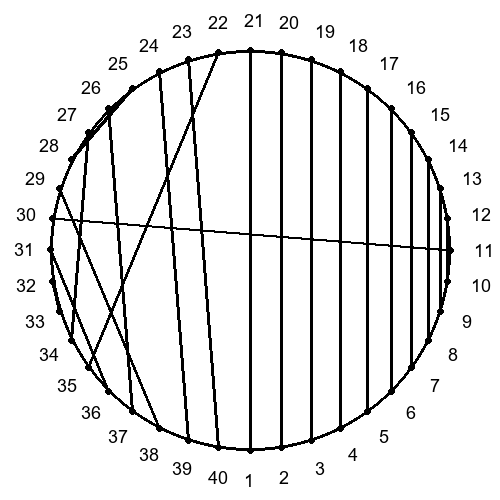

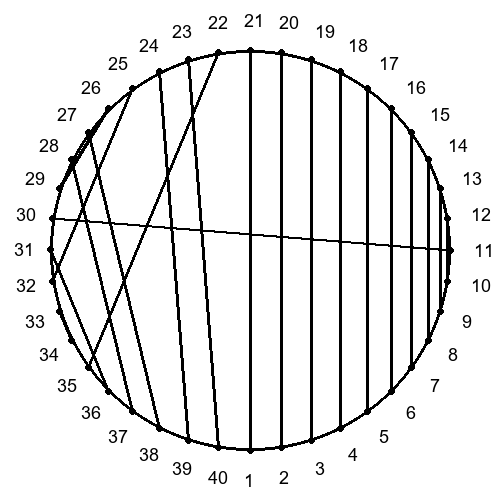

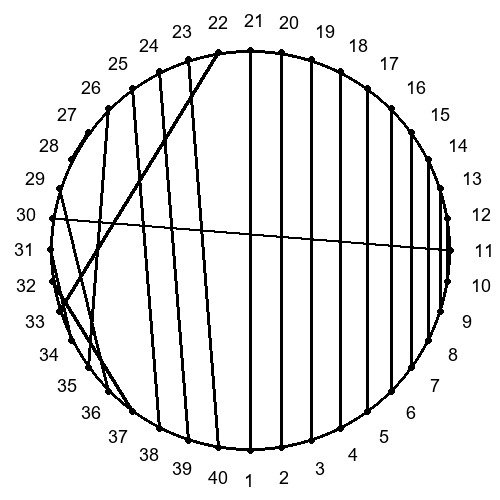

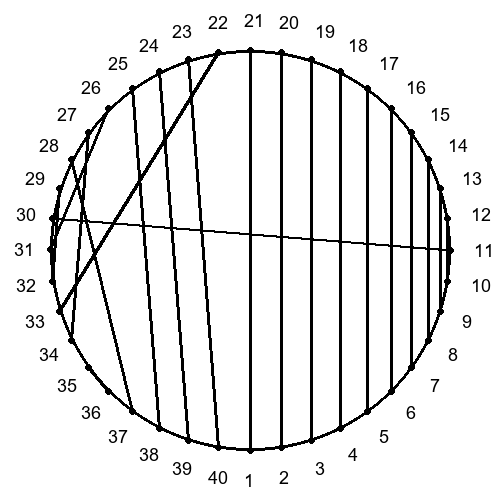

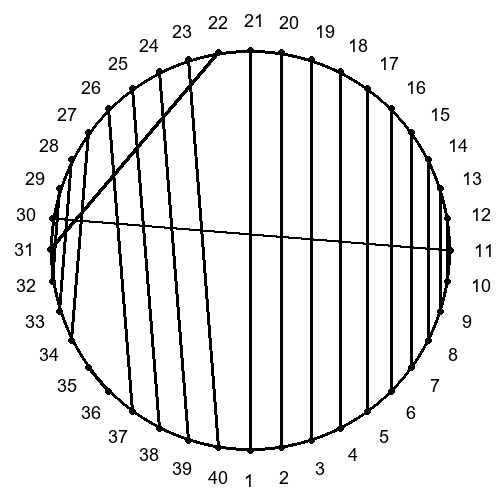

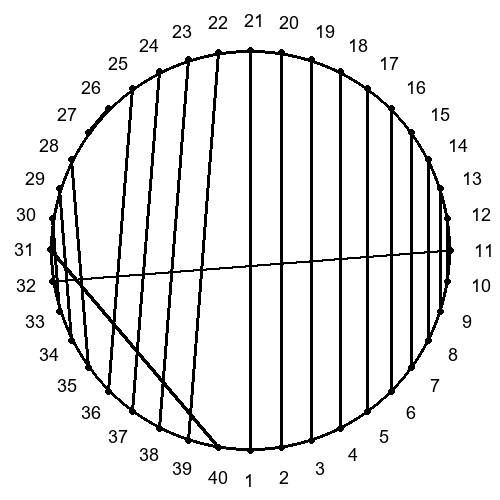

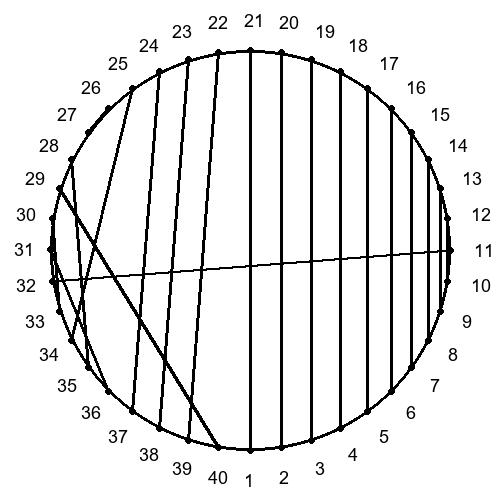

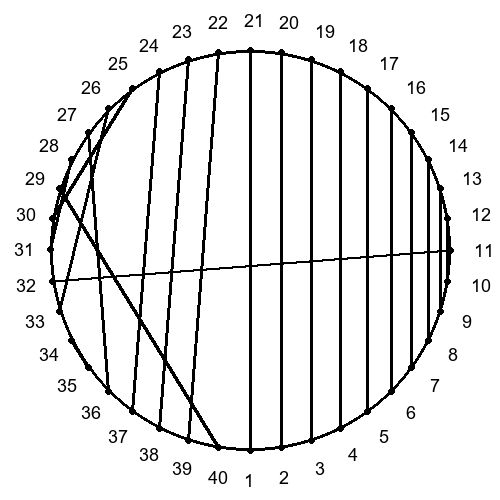

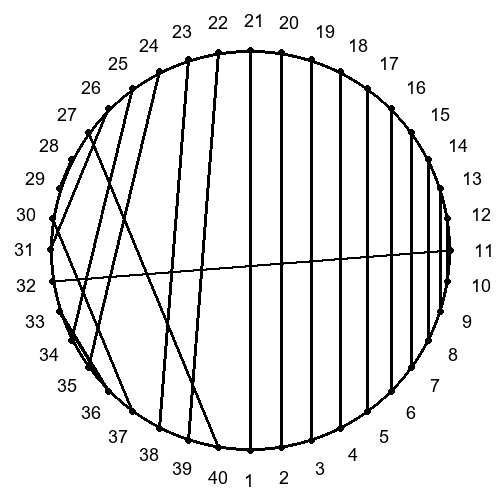

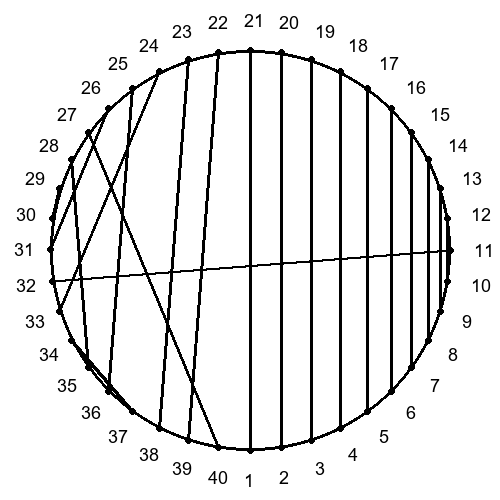

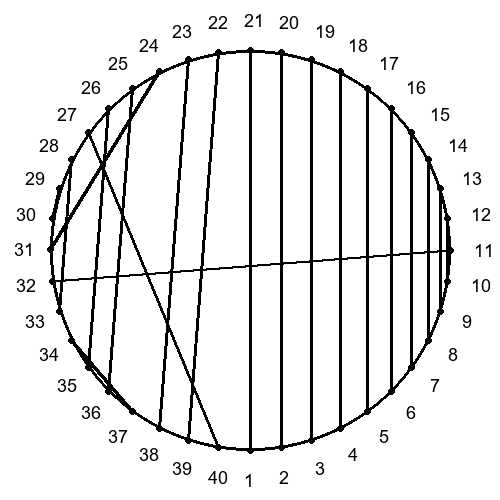

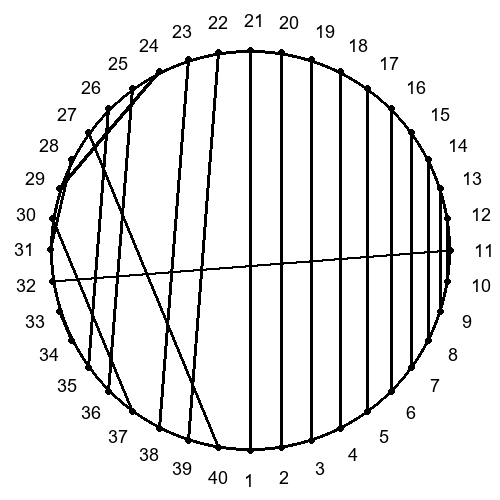

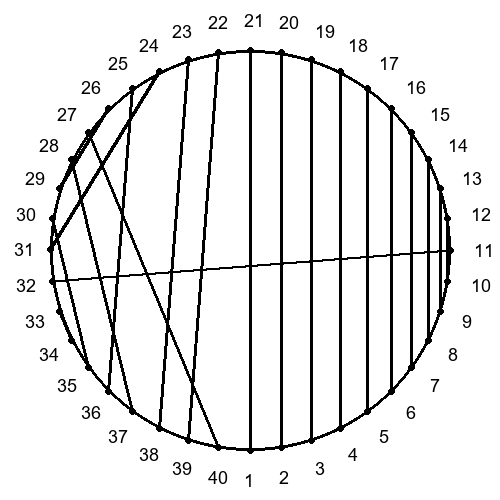

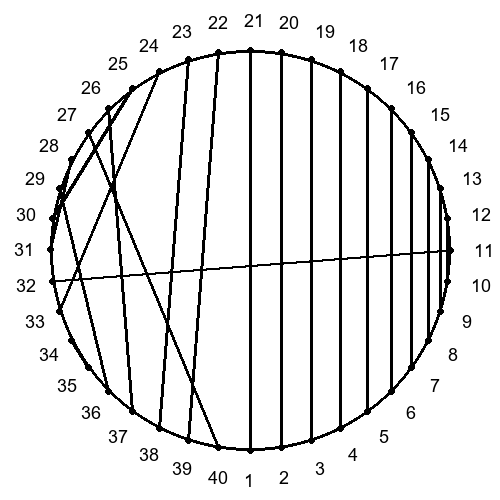

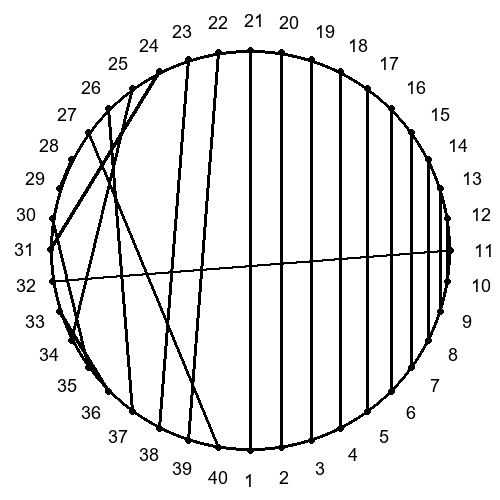

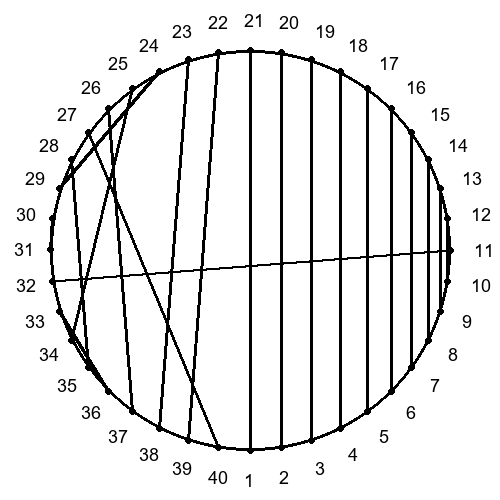

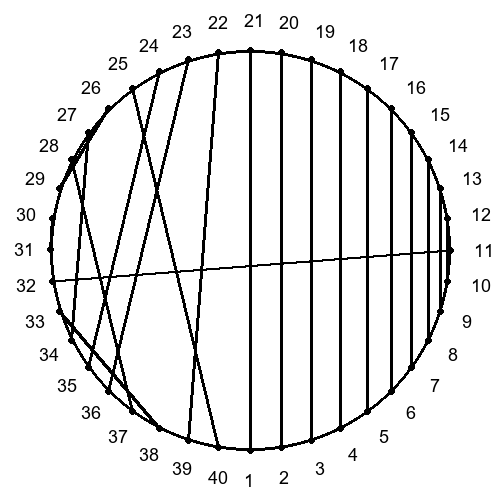

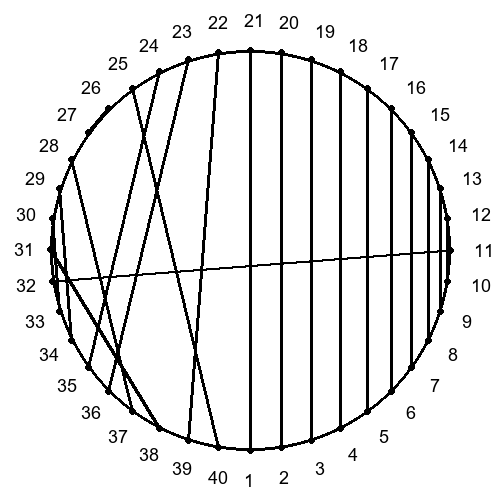

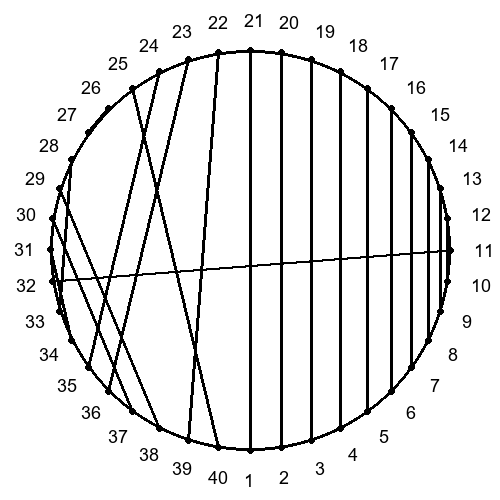

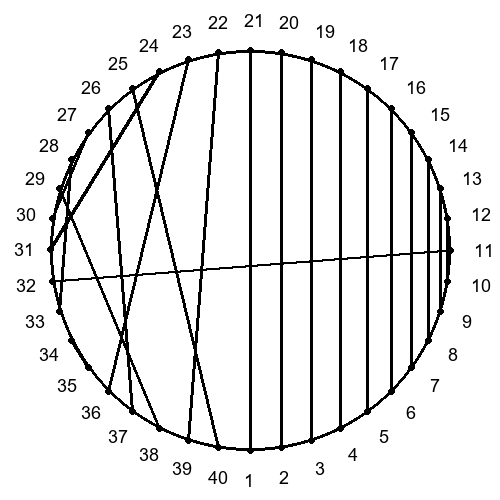

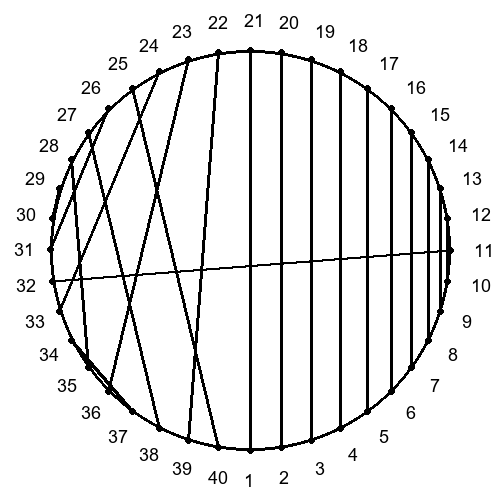

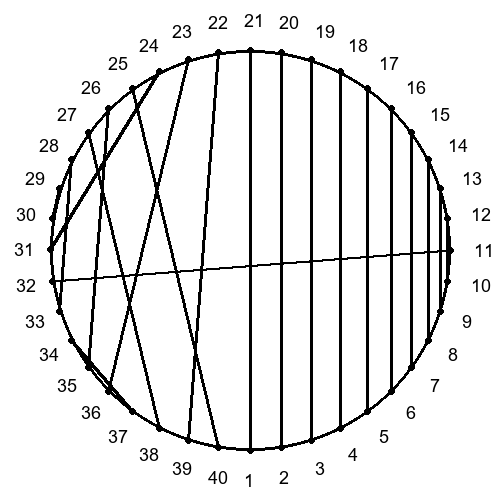

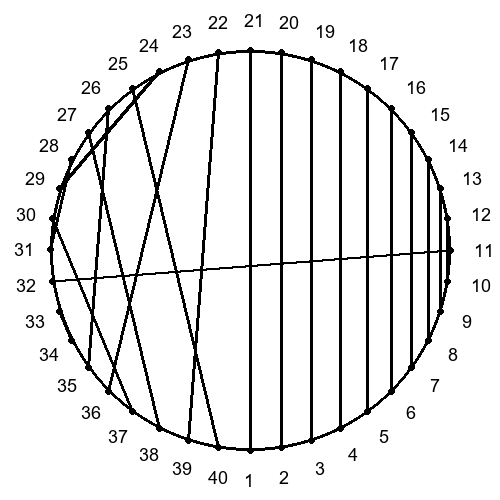

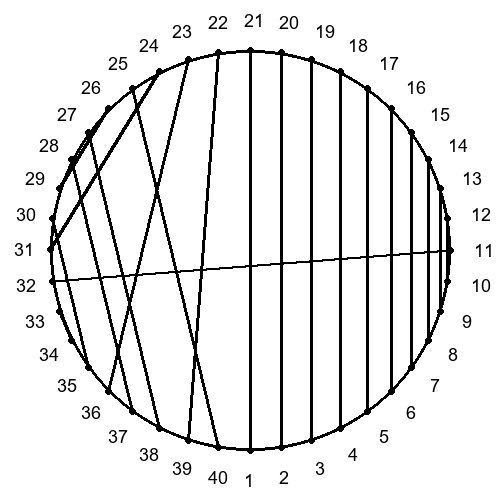

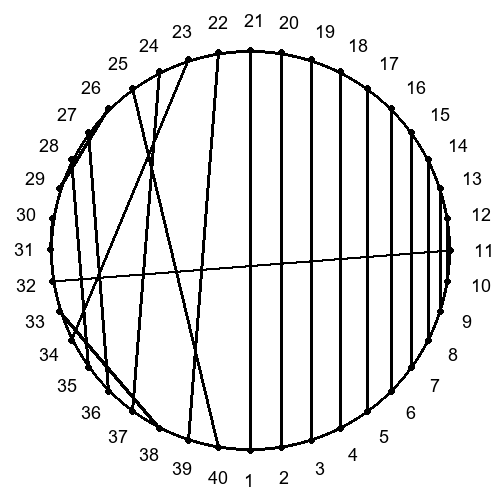

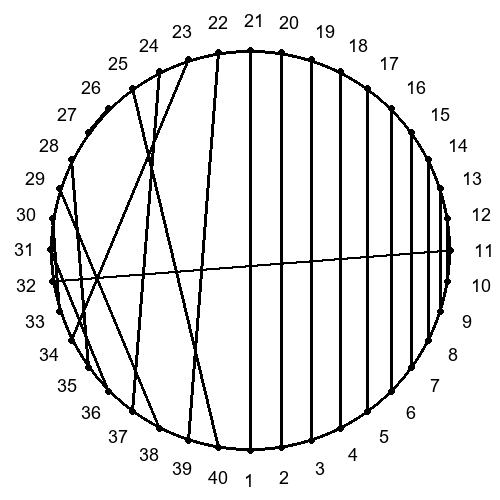

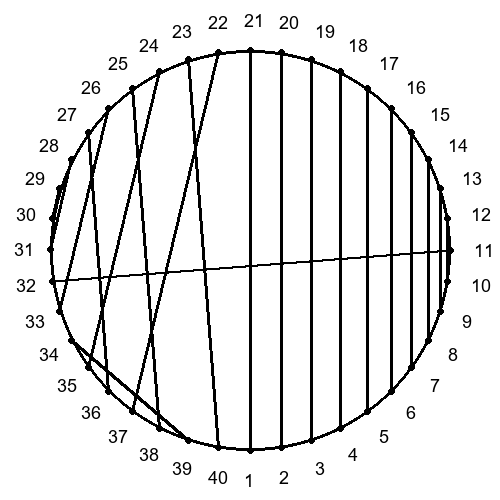

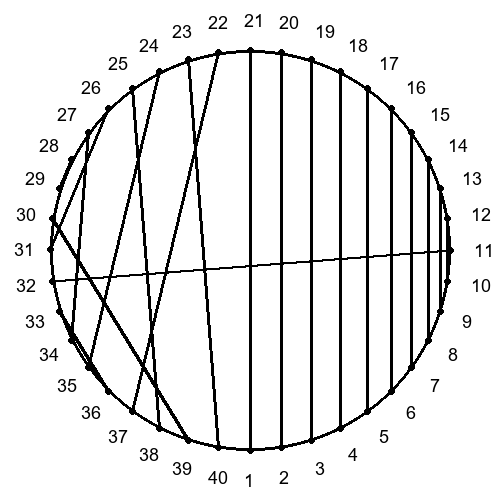

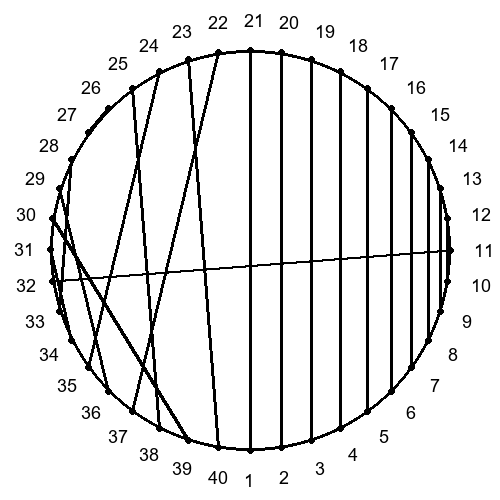

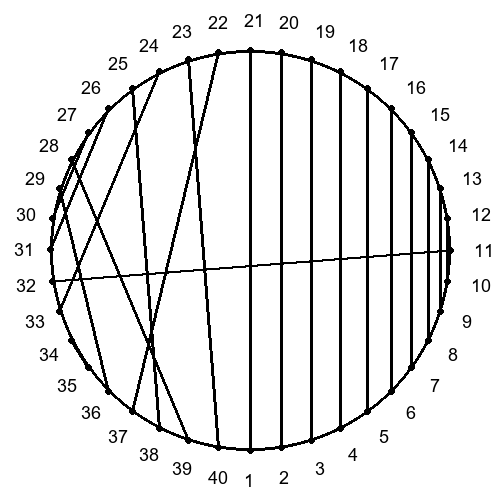

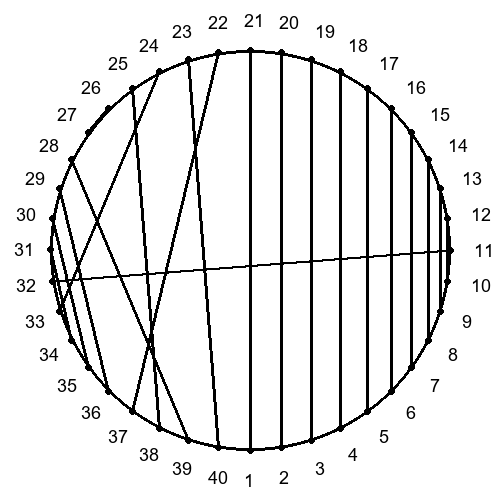

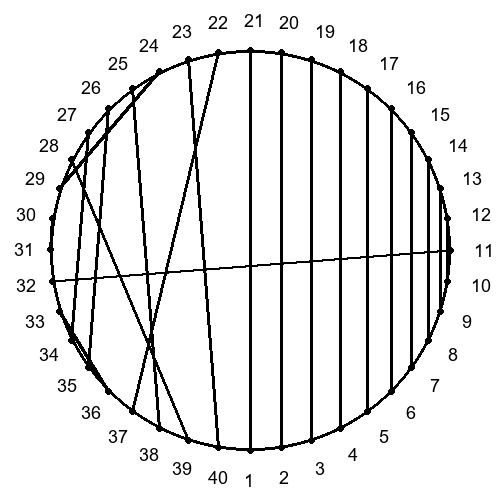

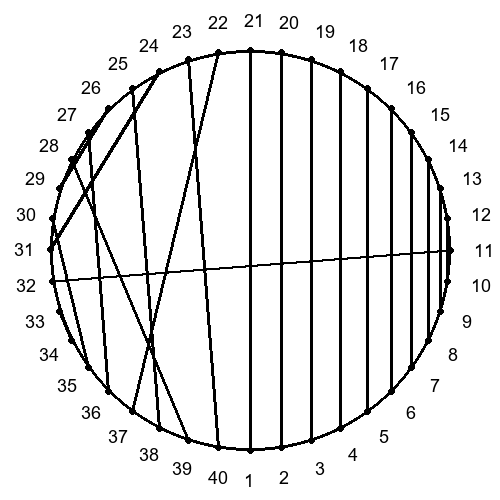

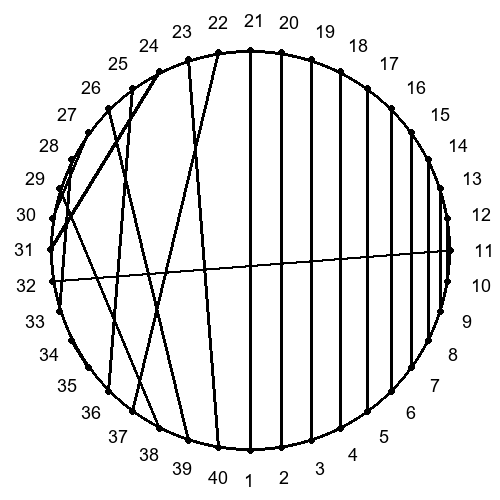

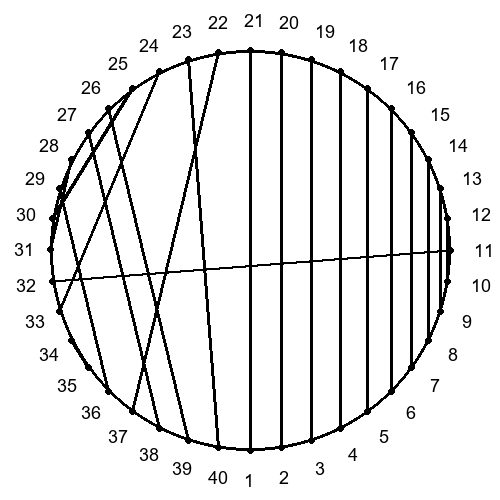

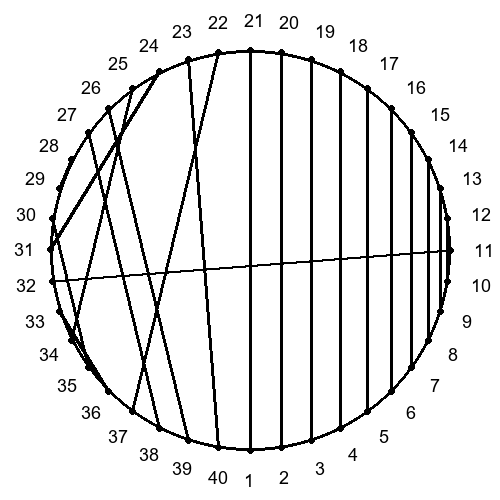

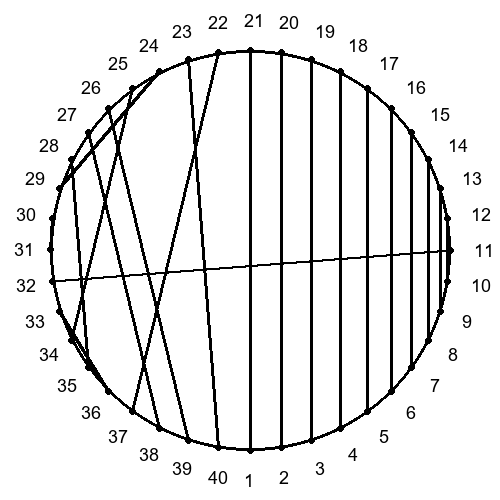

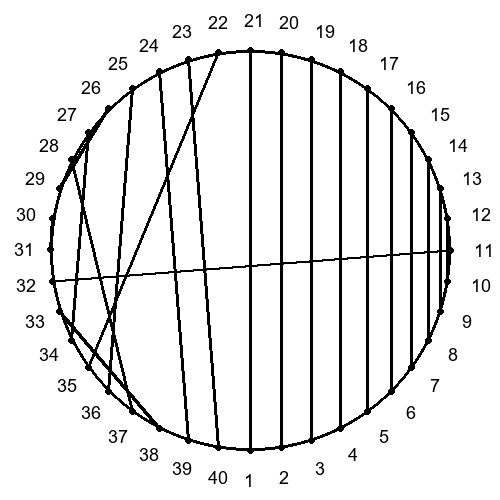

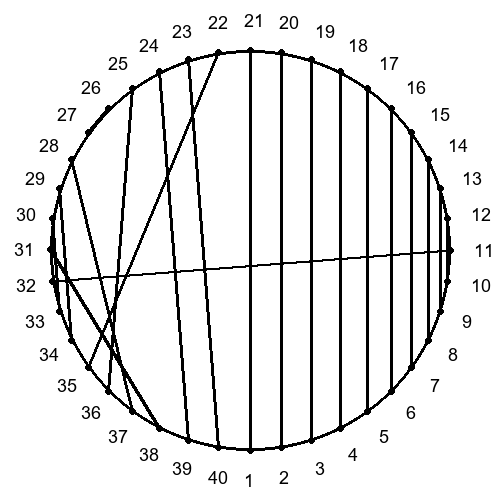

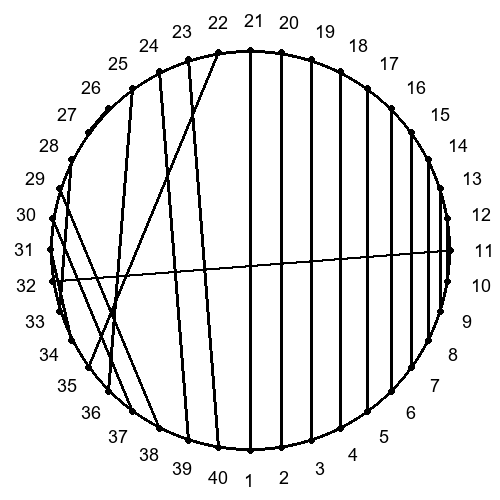

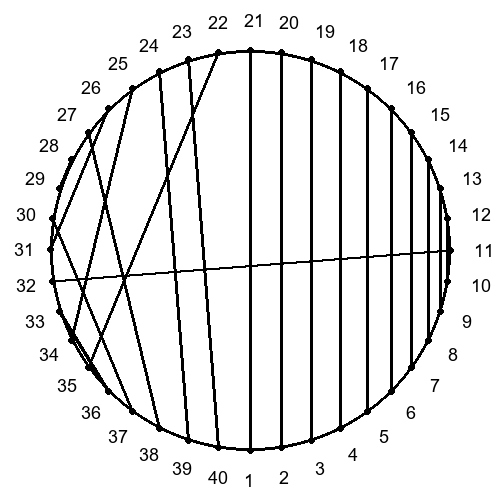

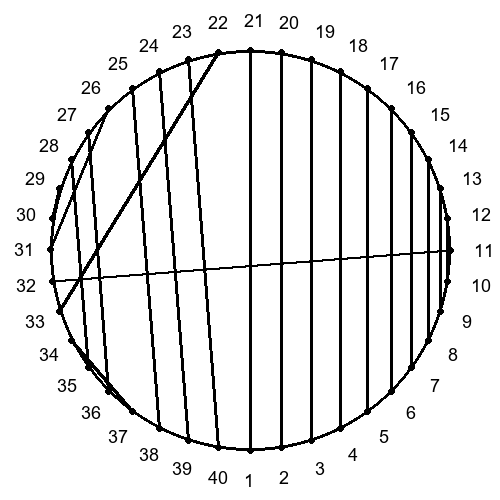

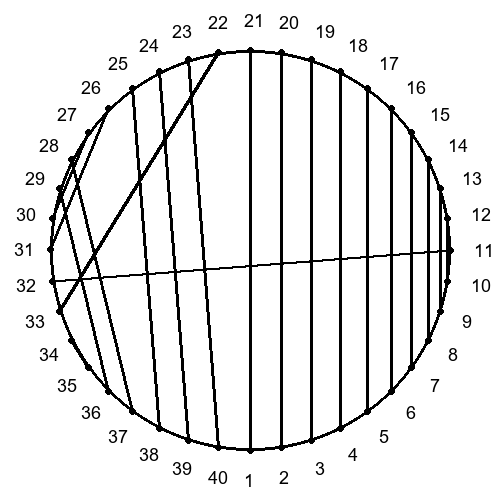

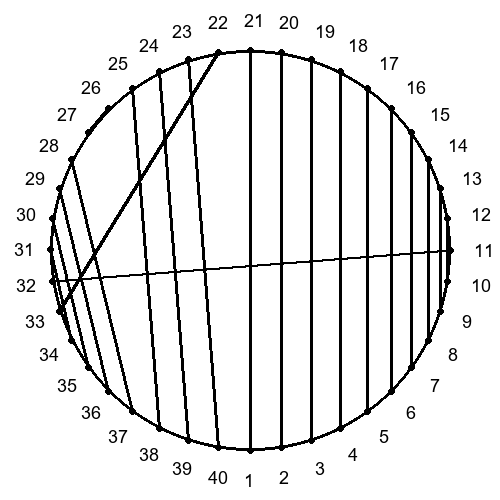

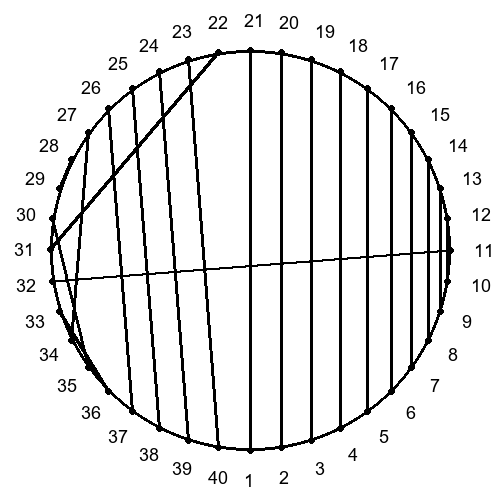

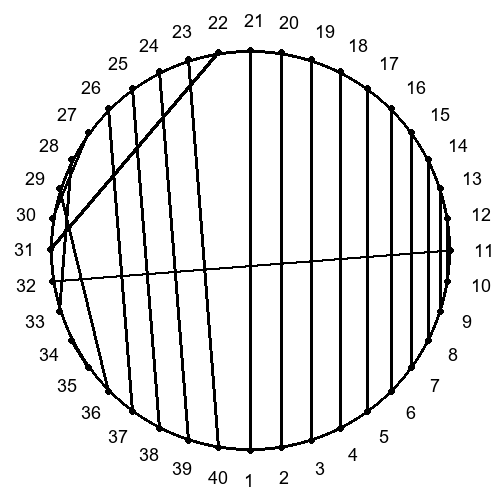

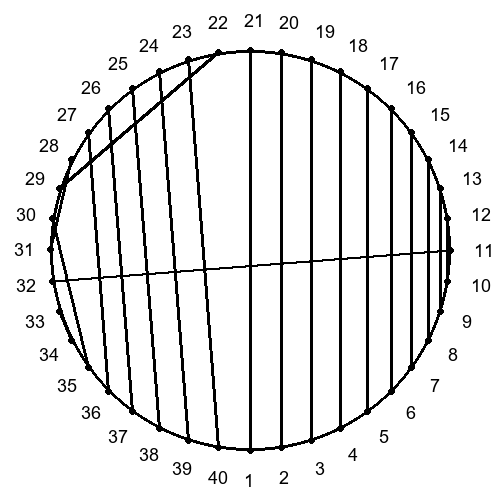

In [97]:
#批量試找答案
n_min = 4
n_max = 20

#solution_max 最多顥示多少個解
solution_max = 100

#只試了n=4k的情況
for n in range(n_min, n_max + 1, 4):

    points = [*range(1, 2*n+1)]
    links = [points for i in range(n)]
    result = [0] * n
    new = [True] * n

    run_continue = solution_max

    #size是圓片大小
    size = 300 + (200 if n >= 16 else 0)

    #這部分可以先填一些預設的規律
    result[-1] = 1
    for i in range(n-2, 0, -2):
        result[i - 1] = (n - i)//2 + 1
        
    result_pair = []
    for i in range(n):
        if result[i] != 0:
            result_pair.append((result[i],add(result[i], i+1, 2*n)))    

    #這裡預覽我們選了的規律
    print("開始的狀態")
    draw_result(result_pair,2*n,bottom = 1, size=size)

    print()
    print("符合的連接")
    extend(result,links,n,new,bottom=1, size = size)

開始的狀態


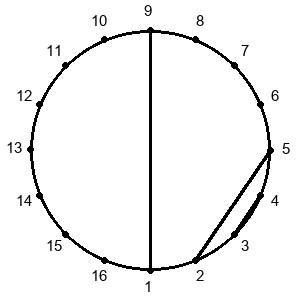


符合的連接


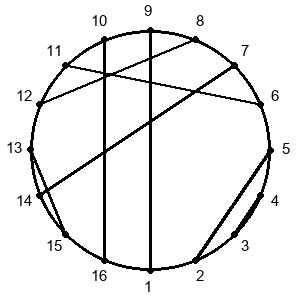

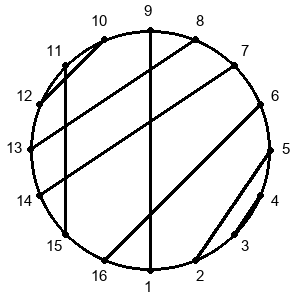

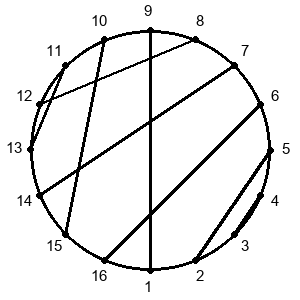

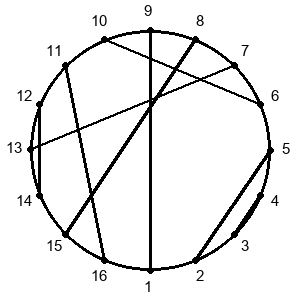

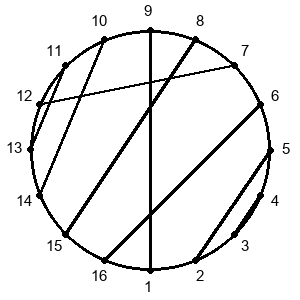

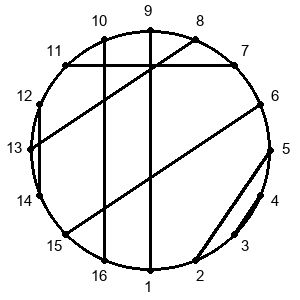

In [107]:
#另一組規律(1/4的奇數線放在右邊)

#主要運行的地方


#設定
#n 代表對數     
n = 8

#solution_max 最多顥示多少個解
solution_max = 100

#size是圓片大小
size = 300


#一些初始化
points = [*range(1, 2*n+1)]
links = [points for i in range(n)]
result = [0] * n
new = [True] * n
run_continue = solution_max


#這部分可以先填一些預設的規律
#這一段例子會中間填直徑, 然後1/4的奇數線放在右邊
result[-1] = 1
for i in range(0, n//4):
    result[2*i] = 1 + n//4 - i

#說明:
#result[i]=x 代表在x處順時針數(i+1)點,與x連上
#例如result[4] = 3, 是連上3和(3+4+1) = 8兩點.
#例如n=10, 要連上20和1(距離1), 應該設定result[0] = 20.

#設定完


result_pair = []
for i in range(n):
    if result[i] != 0:
        result_pair.append((result[i],add(result[i], i+1, 2*n)))
        
        
#這裡預覽我們選了的規律
print("開始的狀態")
draw_result(result_pair,2*n,bottom = 1, size=size)

#這裡開始找解
print()
print("符合的連接")
extend(result,links,n,new,bottom=1, size = size)